In [1]:
#what is a function
def greet_user(name):
        #print(f'hello, {name}')
    salute = f'hello, {name.upper()}'
    return salute

In [2]:
greet_user('dajak')

'hello, DAJAK'

In [3]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mailbox
# put the mbox file into a variable
mboxfile = 'All mail Including Spam and Trash.mbox'

In [4]:
mbox = mailbox.mbox(mboxfile) #To convert the mailbox file to a mbox format for analysis
mbox



In [5]:
#read values(keys) inside mbox
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
Received
DKIM-Signature
Content-Type
MIME-Version
From
To
Subject
List-Unsubscribe
X-CID
Date
Message-ID
X-SMTPAPI
X-QMSG


### Data transformation

In [6]:
#For our analysis, all we need from the KEYS above is data for the following: subject, from,date, to, label, and thread.
#Reason to convert to a csv format.
    

In [7]:
import csv 

In [8]:
# convert the mailbox file to a csv file which is smaller than the original(mailbox) dataset
# Read the data into a dataframe
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([
            message['subject'],
            message['from'],
            message['date'],
            message['to'],
            message['X-Gmail-Labels'],
            message['X-GM-THRID']
             ])

In [9]:
# create a dataframe  from mailbox.csv
dfs = pd.read_csv("mailbox.csv", names=['subject', 'from','date', 'to', 'label', 'thread'])

In [10]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [11]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  181 non-null    object
 1   from     182 non-null    object
 2   date     182 non-null    object
 3   to       181 non-null    object
 4   label    182 non-null    object
 5   thread   182 non-null    object
dtypes: object(6)
memory usage: 8.7+ KB


In [12]:
dfs_subject = dfs['subject']

In [13]:
type(dfs)

pandas.core.frame.DataFrame

In [14]:
#converting date column from object type to date time argument
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [15]:
dfs['date']

0                           NaT
1     2022-08-20 02:01:02+00:00
2     2022-11-12 06:37:10+00:00
3     2022-07-28 12:54:42+00:00
4     2022-07-21 12:54:05+00:00
                 ...           
177   2022-05-26 18:40:23+00:00
178   2022-08-06 10:01:13+00:00
179   2022-06-11 08:35:03+00:00
180   2021-11-18 07:19:46+00:00
181   2022-05-15 13:37:41+00:00
Name: date, Length: 182, dtype: datetime64[ns, UTC]

In [16]:
#remove the nan
dfs = dfs[dfs['date'].notna()]

In [17]:
#save this csv data to a new name
dfs.to_csv('gmail.csv')

### Applying descriptive statistics


In [18]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  180 non-null    object             
 1   from     181 non-null    object             
 2   date     181 non-null    datetime64[ns, UTC]
 3   to       180 non-null    object             
 4   label    181 non-null    object             
 5   thread   181 non-null    object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 9.9+ KB


In [19]:
dfs.head(10)
    

,subject,from,date,to,label,thread
1,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,Quora Digest <english-personalized-digest@quor...,2022-08-20 02:01:02+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1741643698952891193
2,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,Studyportals Monthly <news@students.studyporta...,2022-11-12 06:37:10+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1749271220358809406
3,=?utf-8?q?Why_do_software_companies_still_use_...,Quora Digest <english-personalized-digest@quor...,2022-07-28 12:54:42+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1739601093480939780
4,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,Quora Digest <english-personalized-digest@quor...,2022-07-21 12:54:05+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1738966878598557693
5,Here's your July computer science newsletter! ...,Studyportals Monthly <news@students.studyporta...,2021-07-10 06:04:58+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1704876697077120034
6,Recommended programmes for you!,Studyportals Team <news@students.studyportalsm...,2021-09-29 11:06:43+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1712234034064067529
7,=?utf-8?q?As_a_doctor=2C_what_is_the_best_lie_...,Quora Digest <english-personalized-digest@quor...,2022-09-14 12:34:08+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1743948454810119470
8,Please update to the latest version of Skype f...,"""Skype"" <alerts@email.skype.com>",2017-09-03 04:32:11+00:00,<wolexxie1@gmail.com>,"Inbox,Category Updates,Unread",1577491515328634566
9,=?utf-8?q?I_lost_6=2E57BTC_to_scammers=2C_what...,Quora Digest <english-personalized-digest@quor...,2022-08-13 08:55:24+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1741035589548635658
10,=?utf-8?q?Your_passport_is_still_with_the_us_e...,Quora Digest <english-personalized-digest@quor...,2022-07-01 23:11:24+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1737193776053847106


### Data refactoring

In [20]:

dfs['from'].head(10)

1     Quora Digest <english-personalized-digest@quor...
2     Studyportals Monthly <news@students.studyporta...
3     Quora Digest <english-personalized-digest@quor...
4     Quora Digest <english-personalized-digest@quor...
5     Studyportals Monthly <news@students.studyporta...
6     Studyportals Team <news@students.studyportalsm...
7     Quora Digest <english-personalized-digest@quor...
8                      "Skype" <alerts@email.skype.com>
9     Quora Digest <english-personalized-digest@quor...
10    Quora Digest <english-personalized-digest@quor...
Name: from, dtype: object

### Regular Expression 

In [21]:
import re   #We used the lambda function to apply the function to each and every value in the
            #column.
# Function for extracting the email
def extract_email(string):
    email = re.findall(r'<(.+?)>',string )
    if not email :
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan


In [22]:

dfs['from'] = dfs['from'].apply (lambda x: extract_email(x))  #Next, let's apply the function to the from column:
dfs

,subject,from,date,to,label,thread
1,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,english-personalized-digest@quora.com,2022-08-20 02:01:02+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1741643698952891193
2,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,news@students.studyportalsmail.com,2022-11-12 06:37:10+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1749271220358809406
3,=?utf-8?q?Why_do_software_companies_still_use_...,english-personalized-digest@quora.com,2022-07-28 12:54:42+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1739601093480939780
4,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,english-personalized-digest@quora.com,2022-07-21 12:54:05+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1738966878598557693
5,Here's your July computer science newsletter! ...,news@students.studyportalsmail.com,2021-07-10 06:04:58+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1704876697077120034
...,...,...,...,...,...,...
177,=?utf-8?q?How_does_the_US_embassy_detect_fake_...,english-personalized-digest@quora.com,2022-05-26 18:40:23+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1733915233441759604
178,=?utf-8?q?Do_you_trust_your_parents=3F?=,english-personalized-digest@quora.com,2022-08-06 10:01:13+00:00,wolexxie1@gmail.com,"Inbox,Category Promotions,Unread",1740405551477885254
179,=?utf-8?q?How_could_I_get_rich=3F?=,english-personalized-digest@quora.com,2022-06-11 08:35:03+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1735326700855036208
180,Share your honest opinion on studying at your ...,news@students.studyportalsmail.com,2021-11-18 07:19:46+00:00,wolexxie1@gmail.com,"Inbox,Category Updates,Unread",1716749616536613471


In [23]:
#checking the label column
dfs['label'].head

<bound method NDFrame.head of 1      Inbox,Category Promotions,Unread
2      Inbox,Category Promotions,Unread
3         Inbox,Category Updates,Unread
4      Inbox,Category Promotions,Unread
5         Inbox,Category Updates,Unread
                     ...               
177       Inbox,Category Updates,Unread
178    Inbox,Category Promotions,Unread
179       Inbox,Category Updates,Unread
180       Inbox,Category Updates,Unread
181       Inbox,Category Updates,Unread
Name: label, Length: 181, dtype: object>

In [24]:
dfs['label'].iloc[0]         # Integer location used in SLICING/FILTERING data from the Pandas DataFrame
                               

'Inbox,Category Promotions,Unread'

In [25]:
#refactor the label data
myemail = 'wolexxie1@gmail.com'
dfs['label'] = dfs['from'].apply(
lambda x: 'sent' if x == myemail else 'inbox')

In [26]:
dfs['label'].tail()

177    inbox
178    inbox
179    inbox
180    inbox
181    inbox
Name: label, dtype: object

In [27]:
dfs.head()

,subject,from,date,to,label,thread
1,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,english-personalized-digest@quora.com,2022-08-20 02:01:02+00:00,wolexxie1@gmail.com,inbox,1741643698952891193
2,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,news@students.studyportalsmail.com,2022-11-12 06:37:10+00:00,wolexxie1@gmail.com,inbox,1749271220358809406
3,=?utf-8?q?Why_do_software_companies_still_use_...,english-personalized-digest@quora.com,2022-07-28 12:54:42+00:00,wolexxie1@gmail.com,inbox,1739601093480939780
4,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,english-personalized-digest@quora.com,2022-07-21 12:54:05+00:00,wolexxie1@gmail.com,inbox,1738966878598557693
5,Here's your July computer science newsletter! ...,news@students.studyportalsmail.com,2021-07-10 06:04:58+00:00,wolexxie1@gmail.com,inbox,1704876697077120034


In [28]:
#dropping columns
dfs.drop(columns='to', inplace=True)

In [29]:
# Date column #refactoring the date column
dfs['date'].head()

1   2022-08-20 02:01:02+00:00
2   2022-11-12 06:37:10+00:00
3   2022-07-28 12:54:42+00:00
4   2022-07-21 12:54:05+00:00
5   2021-07-10 06:04:58+00:00
Name: date, dtype: datetime64[ns, UTC]

In [30]:
#import date time packages
import datetime
import pytz

In [31]:
#list of all time zones
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [32]:
#create a function for refactoring time
def refactor_timezone(x):
    aft = pytz.timezone('Africa/Lagos')
    return x.astimezone(aft)

In [33]:
dfs['date'].head()

1   2022-08-20 02:01:02+00:00
2   2022-11-12 06:37:10+00:00
3   2022-07-28 12:54:42+00:00
4   2022-07-21 12:54:05+00:00
5   2021-07-10 06:04:58+00:00
Name: date, dtype: datetime64[ns, UTC]

In [34]:
#applying the function
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))


In [35]:
dfs['date'].head()

1   2022-08-20 03:01:02+01:00
2   2022-11-12 07:37:10+01:00
3   2022-07-28 13:54:42+01:00
4   2022-07-21 13:54:05+01:00
5   2021-07-10 07:04:58+01:00
Name: date, dtype: datetime64[ns, Africa/Lagos]

In [36]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
'Saturday', 'Sunday'], ordered=True)

In [37]:
dfs['dayofweek'].head()

1    Saturday
2    Saturday
3    Thursday
4    Thursday
5    Saturday
Name: dayofweek, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [38]:
dfs['dayofweek'].info()

<class 'pandas.core.series.Series'>
Int64Index: 181 entries, 1 to 181
Series name: dayofweek
Non-Null Count  Dtype   
--------------  -----   
181 non-null    category
dtypes: category(1)
memory usage: 1.9 KB


In [39]:
dfs.head()

,subject,from,date,label,thread,dayofweek
1,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,english-personalized-digest@quora.com,2022-08-20 03:01:02+01:00,inbox,1741643698952891193,Saturday
2,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,news@students.studyportalsmail.com,2022-11-12 07:37:10+01:00,inbox,1749271220358809406,Saturday
3,=?utf-8?q?Why_do_software_companies_still_use_...,english-personalized-digest@quora.com,2022-07-28 13:54:42+01:00,inbox,1739601093480939780,Thursday
4,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,english-personalized-digest@quora.com,2022-07-21 13:54:05+01:00,inbox,1738966878598557693,Thursday
5,Here's your July computer science newsletter! ...,news@students.studyportalsmail.com,2021-07-10 07:04:58+01:00,inbox,1704876697077120034,Saturday


In [40]:
#convert day of the week to category
dfs['dayofweek'] = dfs.dayofweek.astype('category')

In [41]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1 to 181
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   subject    180 non-null    object                      
 1   from       181 non-null    object                      
 2   date       181 non-null    datetime64[ns, Africa/Lagos]
 3   label      181 non-null    object                      
 4   thread     181 non-null    object                      
 5   dayofweek  181 non-null    category                    
dtypes: category(1), datetime64[ns, Africa/Lagos](1), object(4)
memory usage: 9.0+ KB


### refactor for time of day

In [42]:
dfs['timeofday'] =  dfs['date'].apply(lambda x: x.hour + x.minute/60
+ x.second/3600)

In [43]:
dfs[['date', 'dayofweek', 'timeofday']].head()

,date,dayofweek,timeofday
1,2022-08-20 03:01:02+01:00,Saturday,3.017222
2,2022-11-12 07:37:10+01:00,Saturday,7.619444
3,2022-07-28 13:54:42+01:00,Thursday,13.911667
4,2022-07-21 13:54:05+01:00,Thursday,13.901389
5,2021-07-10 07:04:58+01:00,Saturday,7.082778


### refactor for time of hour

In [44]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [45]:
dfs[['date', 'dayofweek', 'timeofday','hour']].head()

,date,dayofweek,timeofday,hour
1,2022-08-20 03:01:02+01:00,Saturday,3.017222,3
2,2022-11-12 07:37:10+01:00,Saturday,7.619444,7
3,2022-07-28 13:54:42+01:00,Thursday,13.911667,13
4,2022-07-21 13:54:05+01:00,Thursday,13.901389,13
5,2021-07-10 07:04:58+01:00,Saturday,7.082778,7


### refactor for time of year

In [46]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [47]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [48]:
dfs[['date', 'dayofweek', 'timeofday','hour','year_int','year']].head()

,date,dayofweek,timeofday,hour,year_int,year
1,2022-08-20 03:01:02+01:00,Saturday,3.017222,3,2022,2022.635181
2,2022-11-12 07:37:10+01:00,Saturday,7.619444,7,2022,2022.865161
3,2022-07-28 13:54:42+01:00,Thursday,13.911667,13,2022,2022.572211
4,2022-07-21 13:54:05+01:00,Thursday,13.901389,13,2022,2022.553046
5,2021-07-10 07:04:58+01:00,Saturday,7.082778,7,2021,2021.522930


### set date as the index

In [49]:
dfs.index = dfs['date']

In [50]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2022-08-20 03:01:02+01:00,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,english-personalized-digest@quora.com,2022-08-20 03:01:02+01:00,inbox,1741643698952891193,Saturday,3.017222,3,2022,2022.635181
2022-11-12 07:37:10+01:00,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,news@students.studyportalsmail.com,2022-11-12 07:37:10+01:00,inbox,1749271220358809406,Saturday,7.619444,7,2022,2022.865161
2022-07-28 13:54:42+01:00,=?utf-8?q?Why_do_software_companies_still_use_...,english-personalized-digest@quora.com,2022-07-28 13:54:42+01:00,inbox,1739601093480939780,Thursday,13.911667,13,2022,2022.572211
2022-07-21 13:54:05+01:00,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,english-personalized-digest@quora.com,2022-07-21 13:54:05+01:00,inbox,1738966878598557693,Thursday,13.901389,13,2022,2022.553046
2021-07-10 07:04:58+01:00,Here's your July computer science newsletter! ...,news@students.studyportalsmail.com,2021-07-10 07:04:58+01:00,inbox,1704876697077120034,Saturday,7.082778,7,2021,2021.522930


### date is no longer needed

In [51]:
dfs.drop(columns = 'date')

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2022-08-20 03:01:02+01:00,=?utf-8?q?I_found_myself_pregnant_and_we_have_...,english-personalized-digest@quora.com,inbox,1741643698952891193,Saturday,3.017222,3,2022,2022.635181
2022-11-12 07:37:10+01:00,=?utf-8?b?8J+TrEhleSE=?= Your Applied Sciences...,news@students.studyportalsmail.com,inbox,1749271220358809406,Saturday,7.619444,7,2022,2022.865161
2022-07-28 13:54:42+01:00,=?utf-8?q?Why_do_software_companies_still_use_...,english-personalized-digest@quora.com,inbox,1739601093480939780,Thursday,13.911667,13,2022,2022.572211
2022-07-21 13:54:05+01:00,=?utf-8?q?In_Javascript_=28=2211=22_+_1_=3D_11...,english-personalized-digest@quora.com,inbox,1738966878598557693,Thursday,13.901389,13,2022,2022.553046
2021-07-10 07:04:58+01:00,Here's your July computer science newsletter! ...,news@students.studyportalsmail.com,inbox,1704876697077120034,Saturday,7.082778,7,2021,2021.522930
...,...,...,...,...,...,...,...,...,...
2022-05-26 19:40:23+01:00,=?utf-8?q?How_does_the_US_embassy_detect_fake_...,english-personalized-digest@quora.com,inbox,1733915233441759604,Thursday,19.673056,19,2022,2022.399726
2022-08-06 11:01:13+01:00,=?utf-8?q?Do_you_trust_your_parents=3F?=,english-personalized-digest@quora.com,inbox,1740405551477885254,Saturday,11.020278,11,2022,2022.596851
2022-06-11 09:35:03+01:00,=?utf-8?q?How_could_I_get_rich=3F?=,english-personalized-digest@quora.com,inbox,1735326700855036208,Saturday,9.584167,9,2022,2022.443532


In [52]:
dfs.loc['2022-05-26']['subject']

date
2022-05-26 19:40:23+01:00    =?utf-8?q?How_does_the_US_embassy_detect_fake_...
Name: subject, dtype: object

In [53]:
dfs.loc['2020']

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2020-06-23 18:22:36+01:00,Fwd: LMT,wolexxie1@gmail.com,2020-06-23 18:22:36+01:00,sent,1670294008077007695,Tuesday,18.376667,18,2020,2020.479124
2020-06-23 13:48:03+01:00,LMT,ochiaks@gmail.com,2020-06-23 13:48:03+01:00,inbox,1670294008077007695,Tuesday,13.800833,13,2020,2020.479124
2020-11-26 20:45:39+01:00,Fwd: Link to download software,wolexxie1@gmail.com,2020-11-26 20:45:39+01:00,sent,1669822338885598666,Thursday,20.760833,20,2020,2020.906229
2020-06-18 12:13:25+01:00,Fwd: Link to download software,wolexxie1@gmail.com,2020-06-18 12:13:25+01:00,sent,1669822338885598666,Thursday,12.223611,12,2020,2020.465435
2020-06-18 08:58:45+01:00,Re: Link to download software,hansonyema1@gmail.com,2020-06-18 08:58:45+01:00,inbox,1669822338885598666,Thursday,8.979167,8,2020,2020.465435
2020-06-18 08:50:35+01:00,Link to download software,hansonyema1@gmail.com,2020-06-18 08:50:35+01:00,inbox,1669822338885598666,Thursday,8.843056,8,2020,2020.465435
2020-09-29 00:20:18+01:00,Fw: cambridge books,truegemini01@yahoo.com,2020-09-29 00:20:18+01:00,inbox,1679121704059785625,Tuesday,0.338333,0,2020,2020.747433
2020-12-04 13:31:07+01:00,Important policy changes for Google Account st...,noreply@google.com,2020-12-04 13:31:07+01:00,inbox,1685150832250539850,Friday,13.518611,13,2020,2020.928131
2020-06-24 17:04:48+01:00,Security alert,no-reply@accounts.google.com,2020-06-24 17:04:48+01:00,inbox,1670396970830940115,Wednesday,17.080000,17,2020,2020.481862


### DATA ANALYSIS

In [54]:
#how many emails did you send during a given time frame
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

Wed, 23 Nov 2016 11:09 AM
Mon, 14 Nov 2022 06:41 PM


In [55]:
dfs.index.min()

Timestamp('2016-11-23 11:09:38+0100', tz='Africa/Lagos')

In [56]:
dfs.index.max()

Timestamp('2022-11-14 18:41:00+0100', tz='Africa/Lagos')

In [57]:
print(dfs['subject'].value_counts())

Recommended programmes for you!                                                                                                     5
Share your honest opinion on studying at your University                                                                            4
Ajakaye Would you share your university review with us?                                                                             3
Security alert                                                                                                                      3
Learn more about our updated Terms of Service                                                                                       2
                                                                                                                                   ..
Your password changed                                                                                                               1
=?utf-8?q?What_are_your_10_laws_of_manhood=3F?=               

### Time of Day

In [58]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [60]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('US/Eastern')
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax,
    color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
    24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax

C:\Users\DELL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4256\3342484110.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,


<AxesSubplot: title={'center': 'Received'}>

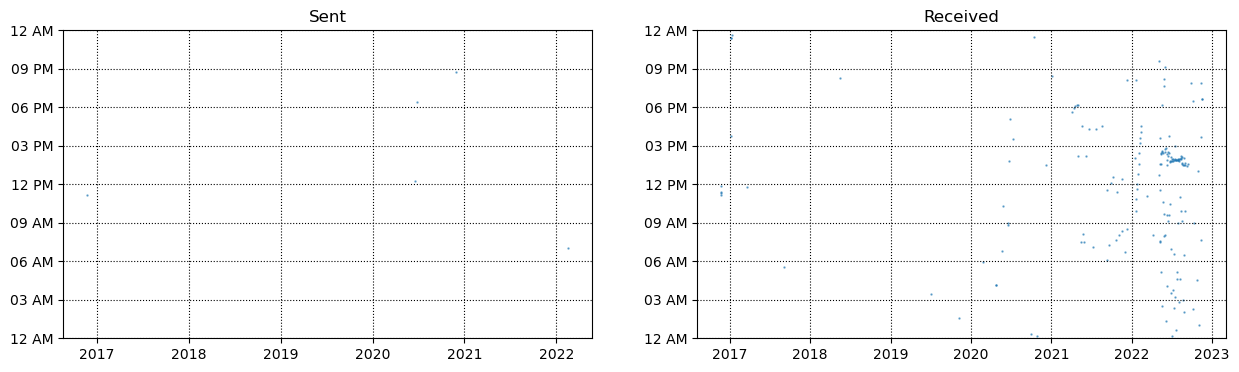

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [62]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3,
     **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label,
    **plot_kwargs);
    ax.grid(ls=':', color='k')

In [63]:
def plot_number_perdhour_per_year(df, ax, label=None, dt=1,
    smooth=False,
    weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
         weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label,
        **plot_kwargs);
        ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
        24))), "%H").strftime("%I %p")
    for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")
    for ts in ax.get_yticks()]);

In [64]:
class TriplePlot:
    def __init__(self):
        gs = gridspec.GridSpec(6, 6)
        self.ax1 = plt.subplot(gs[2:6, :4])
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
        plt.setp(self.ax2.get_yticklabels(), visible=False);
        self.ax3 = plt.subplot(gs[:2, :4])
        plt.setp(self.ax3.get_xticklabels(), visible=False);
        
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5,yr_bin=0.1, hr_bin=0.5):
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin,color=color, alpha=alpha, orientation='horizontal')
        self.ax2.set_xlabel('Average emails per hour')
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin,color=color, alpha=alpha)
        self.ax3.set_ylabel('Average emails per day')

C:\Users\DELL\AppData\Local\Temp\ipykernel_4256\3342484110.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
C:\Users\DELL\AppData\Local\Temp\ipykernel_4256\3257952520.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")


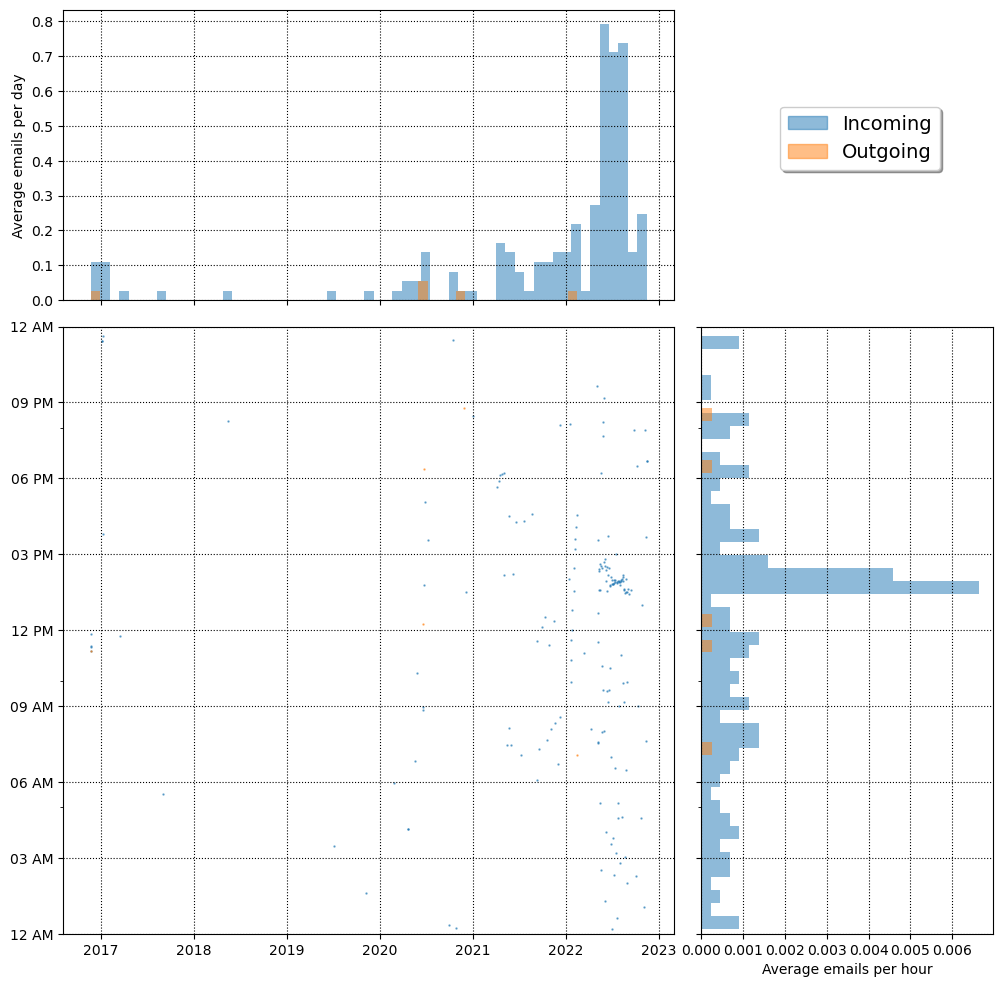

In [65]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7],
fontsize=14, shadow=True);

### Number of emails per day

<AxesSubplot: >

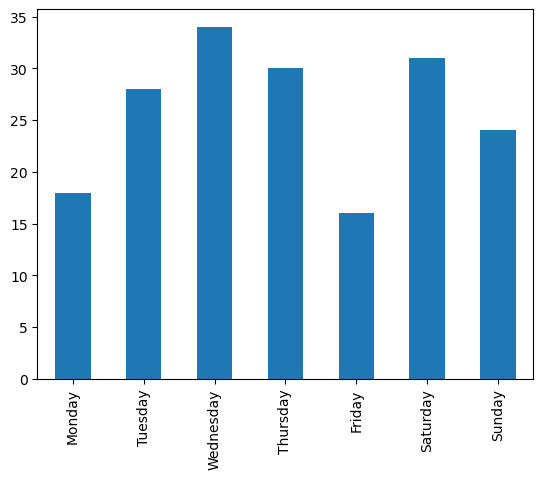

In [66]:
#Let's find the busiest day of the week in terms of emails:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

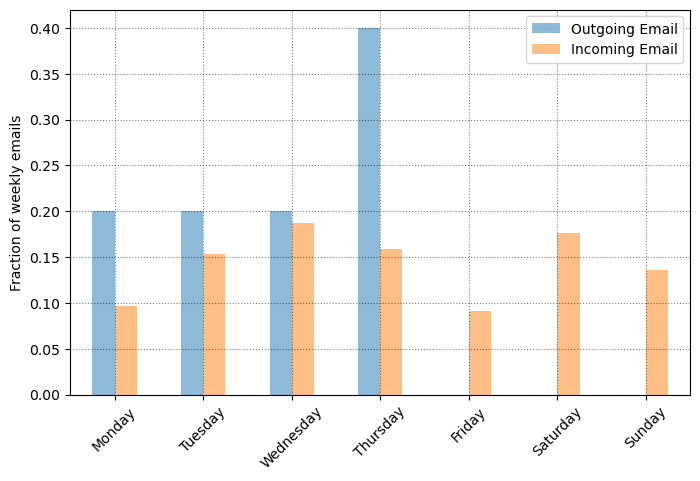

In [67]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4256\3257952520.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts,


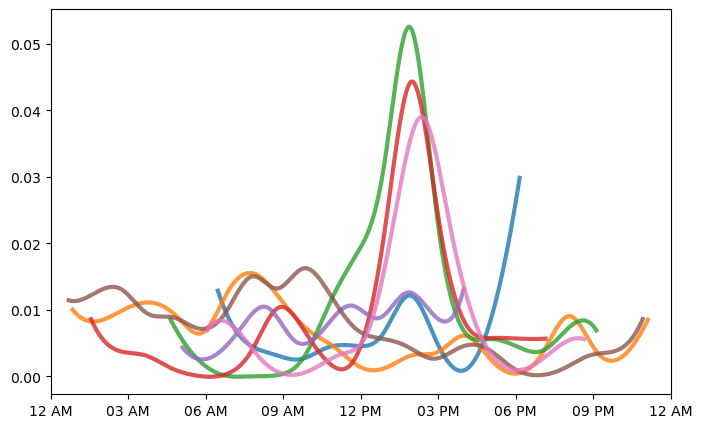

In [68]:
import scipy.ndimage
from scipy.interpolate import interp1d
plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True,color=f'C{ct}', 
                                                    alpha=0.8, lw=3, label=dow, weight_fun=wfun)
    
    #df_s = sent[sent['dayofweek']==dow]
    #weights = np.ones(len(df_s)) / len(sent)
    #wfun = lambda x: weights
    #plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True,color=f'C{ct}',alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
#ax.set_ylabel('Fraction of weekly emails per hour')
#plt.legend(loc='upper left')

### Most frequently used words

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


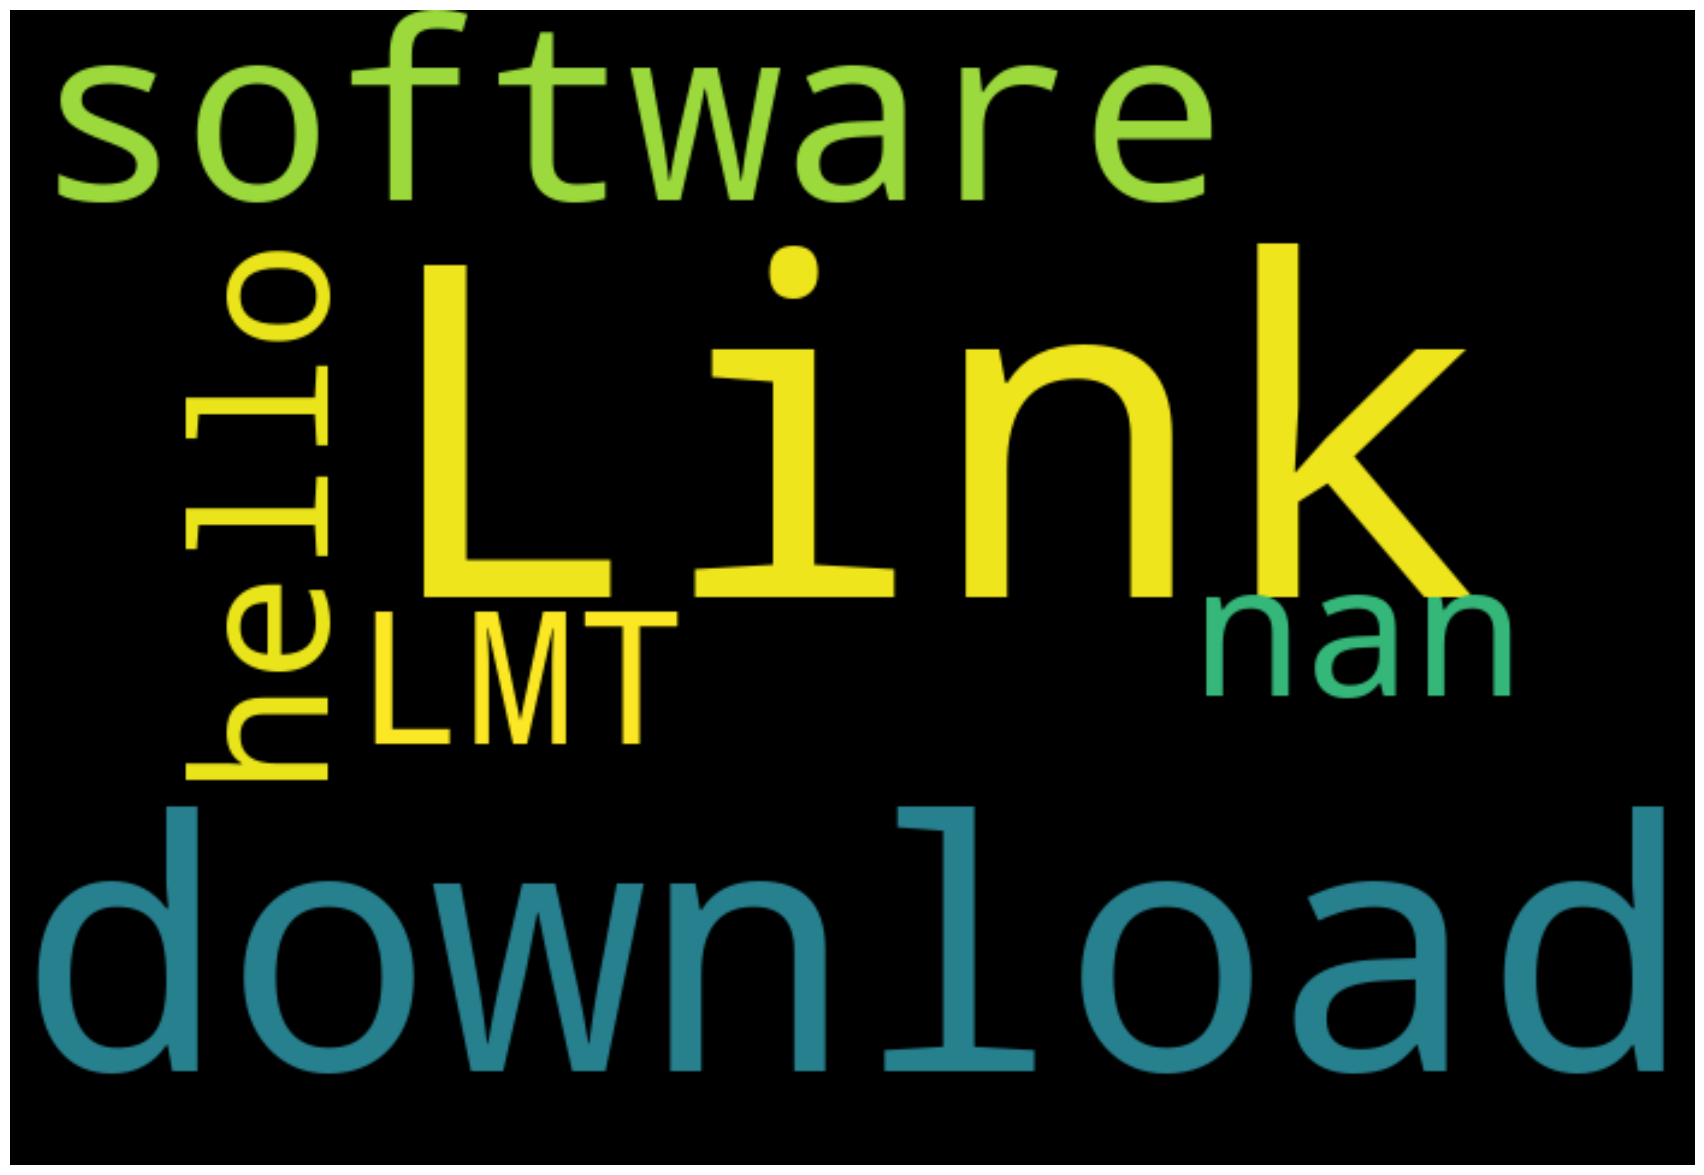

In [70]:
from wordcloud import WordCloud
df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)